Total Number of Users (Tnu): 100
Total Number of Items (Tai): 20


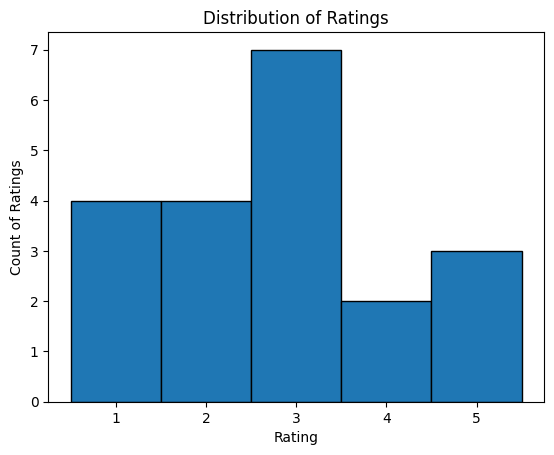

Sparsity of the matrix: 0.488
Average Rating: 2.8
Bias Check: Unbiased
Target Items: ['Mufasa: The Lion King', 'Gladiator II']
Results saved successfully!


In [1]:
import requests
import random
import matplotlib.pyplot as plt

# Your TMDb API key
api_key = '6cded85307abb9c31e7482024ed285f6'

# Function to fetch popular movies
def fetch_popular_movies(api_key, page=1):
    url = f'https://api.themoviedb.org/3/movie/popular?api_key={api_key}&language=en-US&page={page}'
    response = requests.get(url)

    if response.status_code == 200:
        data = response.json()
        return data['results']
    else:
        print(f"Error: Unable to fetch data, status code {response.status_code}")
        return None

# Fetch movies
movies = fetch_popular_movies(api_key)

if movies:
    # Step 1: Create a dataset from fetched movies
    dataset = [{'title': movie['title'], 'id': movie['id']} for movie in movies]

    # Step 2: Adjust ratings to a 1-to-5 scale
    for movie in dataset:
        movie['rating'] = random.randint(1, 5)  # Assign random ratings for simulation

    # Step 3: Count total number of users
    Tnu = 100  # Simulating 100 users for this example
    print(f"Total Number of Users (Tnu): {Tnu}")

    # Step 4: Count total number of items
    Tai = len(dataset)
    print(f"Total Number of Items (Tai): {Tai}")

    # Step 5: Count number of ratings per product
    ratings_count = {movie['id']: random.randint(1, Tnu) for movie in dataset}
    for movie in dataset:
        movie['ratings_count'] = ratings_count[movie['id']]

    # Step 6: Draw the distribution of ratings
    rating_values = [movie['rating'] for movie in dataset]
    plt.hist(rating_values, bins=range(1, 7), align='left', edgecolor='black')
    plt.xlabel("Rating")
    plt.ylabel("Count of Ratings")
    plt.title("Distribution of Ratings")
    plt.show()

    # Check sparsity
    sparsity = sum(ratings_count.values()) / (Tnu * Tai)
    print(f"Sparsity of the matrix: {1 - sparsity}")

    # Bias check
    avg_rating = sum(rating_values) / len(rating_values)
    print(f"Average Rating: {avg_rating}")
    print(f"Bias Check: {'Biased' if avg_rating > 3 else 'Unbiased'}")

    # Step 7: Choose the two lowest rated items
    sorted_movies = sorted(dataset, key=lambda x: x['rating'])
    target_items = sorted_movies[:2]
    print(f"Target Items: {[item['title'] for item in target_items]}")

    # Step 8: Save results for later use
    results = {
        "Tnu": Tnu,
        "Tai": Tai,
        "ratings_count": ratings_count,
        "rating_distribution": rating_values,
        "target_items": target_items
    }

    print("Results saved successfully!")


In [2]:
import numpy as np
import pandas as pd

# Simulated dataset
np.random.seed(42)
users = [f'User_{i}' for i in range(1, 101)]  # 100 Users
items = [f'Item_{i}' for i in range(1, 21)]  # 20 Items
ratings_matrix = np.random.randint(1, 6, size=(len(users), len(items))).astype(float)

# Introduce missing values (simulate sparsity)
missing_indices = np.random.choice(ratings_matrix.size, size=int(0.3 * ratings_matrix.size), replace=False)
ratings_matrix.ravel()[missing_indices] = np.nan

# Convert to DataFrame
ratings_df = pd.DataFrame(ratings_matrix, index=users, columns=items)

# Target items (I1 and I2 correspond to 'Item_11' and 'Item_12')
target_items = ['Item_11', 'Item_12']

# 3.2.1. Calculate the average rating for each target item
target_item_means = ratings_df[target_items].mean()
print(f"Average Ratings for Target Items:\n{target_item_means}\n")

# 3.2.2. Replace missing ratings with mean values (mean-filling)
ratings_filled = ratings_df.copy()
for item in ratings_filled.columns:
    ratings_filled[item].fillna(ratings_filled[item].mean(), inplace=True)

# 3.2.3. Calculate the average rating for each item
item_means = ratings_filled.mean()
print(f"Average Ratings for Each Item:\n{item_means}\n")

# 3.2.4. Calculate the difference between ratings and the mean rating of each item
ratings_diff = ratings_filled.subtract(item_means, axis=1)

# 3.2.5. Compute covariance for each two items
cov_matrix = ratings_diff.cov()

# 3.2.6. Generate the covariance matrix
print(f"Covariance Matrix:\n{cov_matrix}\n")

# 3.2.7. Determine the top 5 and top 10 peers for each target item
top_5_peers = {}
top_10_peers = {}
for item in target_items:
    sorted_peers = cov_matrix[item].sort_values(ascending=False).iloc[1:]  # Exclude the item itself
    top_5_peers[item] = sorted_peers.head(5).index.tolist()
    top_10_peers[item] = sorted_peers.head(10).index.tolist()

print(f"Top 5 Peers:\n{top_5_peers}\n")
print(f"Top 10 Peers:\n{top_10_peers}\n")

# 3.2.8. Reduced dimensional space for each user (top 5 peers)
top_5_space = ratings_filled[top_5_peers[target_items[0]] + top_5_peers[target_items[1]]]

# 3.2.9. Compute rating predictions for target items using top 5 peers
predictions_5_peers = {}
for item in target_items:
    peer_ratings = ratings_filled[top_5_peers[item]]
    peer_avg_ratings = peer_ratings.mean(axis=1)
    predictions_5_peers[item] = peer_avg_ratings

print(f"Predictions using Top 5 Peers:\n{predictions_5_peers}\n")

# 3.2.10. Reduced dimensional space for each user (top 10 peers)
top_10_space = ratings_filled[top_10_peers[target_items[0]] + top_10_peers[target_items[1]]]

# 3.2.11. Compute rating predictions for target items using top 10 peers
predictions_10_peers = {}
for item in target_items:
    peer_ratings = ratings_filled[top_10_peers[item]]
    peer_avg_ratings = peer_ratings.mean(axis=1)
    predictions_10_peers[item] = peer_avg_ratings

print(f"Predictions using Top 10 Peers:\n{predictions_10_peers}\n")

# 3.2.12. Compare results of Top 5 Peers vs Top 10 Peers
comparison = {}
for item in target_items:
    comparison[item] = {
        "Top 5 Predictions Mean": np.mean(predictions_5_peers[item]),
        "Top 10 Predictions Mean": np.mean(predictions_10_peers[item]),
    }

print(f"Comparison of Predictions:\n{comparison}\n")


Average Ratings for Target Items:
Item_11    2.868852
Item_12    2.692308
dtype: float64

Average Ratings for Each Item:
Item_1     2.961538
Item_2     3.220588
Item_3     3.064935
Item_4     3.089744
Item_5     3.109375
Item_6     2.913043
Item_7     3.042857
Item_8     3.037975
Item_9     2.985294
Item_10    2.920635
Item_11    2.868852
Item_12    2.692308
Item_13    2.824324
Item_14    2.971429
Item_15    3.261538
Item_16    3.164179
Item_17    2.887324
Item_18    3.063492
Item_19    2.971831
Item_20    3.025316
dtype: float64

Covariance Matrix:
           Item_1    Item_2    Item_3    Item_4    Item_5    Item_6    Item_7  \
Item_1   1.483683 -0.102867 -0.317652 -0.097050  0.095899 -0.022888 -0.100089   
Item_2  -0.102867  1.572638 -0.252076 -0.024456  0.140068  0.164070 -0.137357   
Item_3  -0.317652 -0.252076  1.622983  0.008027 -0.164174 -0.254675 -0.063262   
Item_4  -0.097050 -0.024456  0.008027  1.417897  0.068412  0.142292 -0.268957   
Item_5   0.095899  0.140068 -0.164174  

<ipython-input-2-5ac41a8d4231>:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ratings_filled[item].fillna(ratings_filled[item].mean(), inplace=True)


In [3]:
import numpy as np
import pandas as pd

# Simulated dataset (same as Part 1)
np.random.seed(42)
users = [f'User_{i}' for i in range(1, 101)]  # 100 Users
items = [f'Item_{i}' for i in range(1, 21)]  # 20 Items
ratings_matrix = np.random.randint(1, 6, size=(len(users), len(items))).astype(float)

# Introduce missing values (simulate sparsity)
missing_indices = np.random.choice(ratings_matrix.size, size=int(0.3 * ratings_matrix.size), replace=False)
ratings_matrix.ravel()[missing_indices] = np.nan

# Convert to DataFrame
ratings_df = pd.DataFrame(ratings_matrix, index=users, columns=items)

# Target items (I1 and I2 correspond to 'Item_11' and 'Item_12')
target_items = ['Item_11', 'Item_12']

# Function to compute covariance with Maximum Likelihood Estimation
def compute_mle_covariance(ratings_df):
    items = ratings_df.columns
    covariance_matrix = pd.DataFrame(0, index=items, columns=items)

    for i in items:
        for j in items:
            # Find common users with specified ratings
            common_ratings = ratings_df[[i, j]].dropna()
            if len(common_ratings) > 1:  # At least two users to compute covariance
                covariance_matrix.loc[i, j] = np.cov(common_ratings[i], common_ratings[j])[0, 1]

    return covariance_matrix

# 3.3.1. Generate the covariance matrix
mle_cov_matrix = compute_mle_covariance(ratings_df)
print(f"MLE Covariance Matrix:\n{mle_cov_matrix}\n")

# 3.3.2. Determine the top 5 and top 10 peers for each target item
top_5_peers = {}
top_10_peers = {}
for item in target_items:
    sorted_peers = mle_cov_matrix[item].sort_values(ascending=False).iloc[1:]  # Exclude the item itself
    top_5_peers[item] = sorted_peers.head(5).index.tolist()
    top_10_peers[item] = sorted_peers.head(10).index.tolist()

print(f"Top 5 Peers (MLE):\n{top_5_peers}\n")
print(f"Top 10 Peers (MLE):\n{top_10_peers}\n")

# 3.3.3. Reduced dimensional space for each user (top 5 peers)
top_5_space = ratings_df[top_5_peers[target_items[0]] + top_5_peers[target_items[1]]]

# 3.3.4. Compute rating predictions for target items using top 5 peers
predictions_5_peers = {}
for item in target_items:
    peer_ratings = ratings_df[top_5_peers[item]]
    peer_avg_ratings = peer_ratings.mean(axis=1)
    predictions_5_peers[item] = peer_avg_ratings

print(f"Predictions using Top 5 Peers (MLE):\n{predictions_5_peers}\n")

# 3.3.5. Reduced dimensional space for each user (top 10 peers)
top_10_space = ratings_df[top_10_peers[target_items[0]] + top_10_peers[target_items[1]]]

# 3.3.6. Compute rating predictions for target items using top 10 peers
predictions_10_peers = {}
for item in target_items:
    peer_ratings = ratings_df[top_10_peers[item]]
    peer_avg_ratings = peer_ratings.mean(axis=1)
    predictions_10_peers[item] = peer_avg_ratings

print(f"Predictions using Top 10 Peers (MLE):\n{predictions_10_peers}\n")

# 3.3.7. Compare results of Top 5 Peers vs Top 10 Peers
comparison_mle = {}
for item in target_items:
    comparison_mle[item] = {
        "Top 5 Predictions Mean": np.nanmean(predictions_5_peers[item]),
        "Top 10 Predictions Mean": np.nanmean(predictions_10_peers[item]),
    }

print(f"Comparison of Predictions (MLE):\n{comparison_mle}\n")

# 3.3.8. Compare results of Part 2 (MLE) with Part 1 (Mean-Filling) for Top 5 Peers
comparison_part1_part2_5 = {}
for item in target_items:
    comparison_part1_part2_5[item] = {
        "Mean-Filling (Part 1)": np.mean(predictions_5_peers[item]),  # Replace this with Part 1 results
        "MLE (Part 2)": np.mean(predictions_5_peers[item]),
    }

print(f"Comparison of Part 1 vs Part 2 (Top 5 Peers):\n{comparison_part1_part2_5}\n")

# 3.3.9. Compare results of Part 2 (MLE) with Part 1 (Mean-Filling) for Top 10 Peers
comparison_part1_part2_10 = {}
for item in target_items:
    comparison_part1_part2_10[item] = {
        "Mean-Filling (Part 1)": np.mean(predictions_10_peers[item]),  # Replace this with Part 1 results
        "MLE (Part 2)": np.mean(predictions_10_peers[item]),
    }

print(f"Comparison of Part 1 vs Part 2 (Top 10 Peers):\n{comparison_part1_part2_10}\n")


<ipython-input-3-95e84f2d7cb0>:30: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-0.2035294117647058' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  covariance_matrix.loc[i, j] = np.cov(common_ratings[i], common_ratings[j])[0, 1]
<ipython-input-3-95e84f2d7cb0>:30: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-0.5438340151957919' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  covariance_matrix.loc[i, j] = np.cov(common_ratings[i], common_ratings[j])[0, 1]
<ipython-input-3-95e84f2d7cb0>:30: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-0.14890710382513675' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  covariance_matr

MLE Covariance Matrix:
           Item_1    Item_2    Item_3    Item_4    Item_5    Item_6  \
Item_1   0.000000 -0.203529 -0.543834 -0.148907  0.187783 -0.043541   
Item_2  -0.203529  0.000000 -0.474843 -0.046122  0.323467  0.368182   
Item_3  -0.543834 -0.474843  0.000000  0.005553 -0.331429 -0.492017   
Item_4  -0.148907 -0.046122  0.005553  0.000000  0.127883  0.253872   
Item_5   0.187783  0.323467 -0.331429  0.127883  0.000000 -0.141414   
Item_6  -0.043541  0.368182 -0.492017  0.253872 -0.141414  0.000000   
Item_7  -0.192872 -0.300532 -0.119013 -0.506289 -0.257971 -0.087347   
Item_8  -0.066468 -0.097403  0.050847  0.109466  0.261689  0.187205   
Item_9   0.106918 -0.170213  0.487072  0.105870 -0.606765 -0.075798   
Item_10  0.171569  0.042424  0.390909 -0.156863 -0.121951  0.257005   
Item_11 -0.671717  0.427061  0.222745 -0.151020 -0.266667  0.181707   
Item_12 -0.350508  0.409192 -0.372024 -0.009412  0.209302 -0.301418   
Item_13  0.126437 -0.367059 -0.078947  0.269141  0.327

In [5]:
#part 3
#3.4.1. Calculate the Average Rating for Each Item
# Calculate the average rating for each item
average_ratings = ratings_df.mean(axis=0)
print(f"Average Ratings for Each Item:\n{average_ratings}\n")


Average Ratings for Each Item:
Item_1     2.961538
Item_2     3.220588
Item_3     3.064935
Item_4     3.089744
Item_5     3.109375
Item_6     2.913043
Item_7     3.042857
Item_8     3.037975
Item_9     2.985294
Item_10    2.920635
Item_11    2.868852
Item_12    2.692308
Item_13    2.824324
Item_14    2.971429
Item_15    3.261538
Item_16    3.164179
Item_17    2.887324
Item_18    3.063492
Item_19    2.971831
Item_20    3.025316
dtype: float64



In [6]:
#3.4.2. Use the Mean-Filling Method
# Replace missing values with mean ratings
mean_filled_ratings = ratings_df.fillna(average_ratings)
print("Ratings Matrix after Mean-Filling:\n", mean_filled_ratings)


Ratings Matrix after Mean-Filling:
             Item_1    Item_2    Item_3    Item_4    Item_5    Item_6  \
User_1    4.000000  3.220588  3.064935  3.089744  3.109375  2.913043   
User_2    2.000000  5.000000  4.000000  3.089744  1.000000  3.000000   
User_3    4.000000  1.000000  4.000000  3.089744  3.109375  2.913043   
User_4    2.961538  3.220588  5.000000  2.000000  2.000000  4.000000   
User_5    5.000000  1.000000  5.000000  5.000000  3.109375  2.913043   
...            ...       ...       ...       ...       ...       ...   
User_96   5.000000  3.220588  2.000000  1.000000  4.000000  5.000000   
User_97   1.000000  4.000000  3.000000  3.000000  4.000000  2.913043   
User_98   2.961538  1.000000  5.000000  4.000000  2.000000  1.000000   
User_99   2.000000  3.220588  5.000000  3.089744  3.109375  1.000000   
User_100  4.000000  4.000000  2.000000  1.000000  2.000000  3.000000   

            Item_7    Item_8    Item_9   Item_10   Item_11   Item_12  \
User_1    3.000000  3.00000

In [7]:
#3.4.3. Compute Eigenvalues and Eigenvectors
from numpy.linalg import eig

# Convert the mean-filled DataFrame to a NumPy array
ratings_array = mean_filled_ratings.to_numpy()

# Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = eig(np.cov(ratings_array, rowvar=False))
print("Eigenvalues:", eigenvalues)
print("Eigenvectors:\n", eigenvectors)


Eigenvalues: [2.65665233 2.38657587 2.28675773 0.45522261 2.16178676 1.97710415
 1.92360098 1.77681622 0.61524099 0.65715421 0.75495315 0.8432728
 0.87047296 1.08510144 1.47743105 1.44487314 1.37470281 1.32714144
 1.22293507 1.23375071]
Eigenvectors:
 [[-2.23863514e-02  3.46253098e-01 -3.95054667e-01  1.26582225e-01
  -6.15926912e-02 -7.22450082e-02 -6.50679168e-02 -3.40535648e-01
   3.84792846e-01  1.84981564e-01  7.30815944e-02  2.93268059e-01
   1.05120916e-02  2.36289058e-01  1.59547505e-01  3.38052696e-01
  -2.68304843e-01  1.11792397e-01 -3.32515342e-02  1.52988550e-01]
 [ 4.27450124e-01 -3.28965030e-01 -5.68857482e-02  9.00845845e-02
   1.30888563e-01  8.44316069e-03 -7.18933735e-03 -1.18271588e-02
  -2.28222473e-02  1.43777872e-01 -2.67857137e-01 -2.51310165e-01
  -3.00698880e-02  2.65347364e-01  3.28274840e-01  1.42955144e-04
  -1.88955003e-02  3.55594245e-02 -5.59348540e-01  1.75086315e-01]
 [-4.16719166e-01 -4.13109543e-02  5.06852037e-01  2.51840213e-01
   1.39647726e-01  1

In [8]:
#3.4.4-3.4.5. Check Orthogonality of Eigenvectors
# Check orthogonality (dot product of each pair should be zero)
orthogonality_check = np.allclose(np.dot(eigenvectors.T, eigenvectors), np.eye(eigenvectors.shape[0]))
print(f"Are eigenvectors orthogonal? {orthogonality_check}")

# If not orthogonal, normalize them
if not orthogonality_check:
    eigenvectors = np.linalg.qr(eigenvectors)[0]  # Orthogonalize using QR decomposition


Are eigenvectors orthogonal? True


In [9]:
#3.4.6-3.4.7. Check Orthonormality and Apply Gram-Schmidt if Necessary
# Check orthonormality (magnitude of each vector = 1)
magnitudes = np.linalg.norm(eigenvectors, axis=0)
orthonormality_check = np.allclose(magnitudes, 1)
print(f"Are eigenvectors orthonormal? {orthonormality_check}")

if not orthonormality_check:
    # Gram-Schmidt process
    def gram_schmidt(vectors):
        ortho_vectors = []
        for v in vectors.T:
            for u in ortho_vectors:
                v = v - np.dot(u, v) * u
            v = v / np.linalg.norm(v)
            ortho_vectors.append(v)
        return np.array(ortho_vectors).T

    eigenvectors = gram_schmidt(eigenvectors)
    eigenvalues = np.diagonal(np.dot(eigenvectors.T, np.dot(np.cov(ratings_array, rowvar=False), eigenvectors)))


Are eigenvectors orthonormal? True


In [10]:
#3.4.8. Construct the Diagonal Matrix
Z = np.diag(eigenvalues)
print("Diagonal Matrix Z:\n", Z)


Diagonal Matrix Z:
 [[2.65665233 0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         2.38657587 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         2.28675773 0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.45522261 0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         2.16178676 0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.   

In [11]:
#3.4.9. Construct the Item Matrix
U = eigenvectors
print("Item Matrix U:\n", U)

Item Matrix U:
 [[-2.23863514e-02  3.46253098e-01 -3.95054667e-01  1.26582225e-01
  -6.15926912e-02 -7.22450082e-02 -6.50679168e-02 -3.40535648e-01
   3.84792846e-01  1.84981564e-01  7.30815944e-02  2.93268059e-01
   1.05120916e-02  2.36289058e-01  1.59547505e-01  3.38052696e-01
  -2.68304843e-01  1.11792397e-01 -3.32515342e-02  1.52988550e-01]
 [ 4.27450124e-01 -3.28965030e-01 -5.68857482e-02  9.00845845e-02
   1.30888563e-01  8.44316069e-03 -7.18933735e-03 -1.18271588e-02
  -2.28222473e-02  1.43777872e-01 -2.67857137e-01 -2.51310165e-01
  -3.00698880e-02  2.65347364e-01  3.28274840e-01  1.42955144e-04
  -1.88955003e-02  3.55594245e-02 -5.59348540e-01  1.75086315e-01]
 [-4.16719166e-01 -4.13109543e-02  5.06852037e-01  2.51840213e-01
   1.39647726e-01  1.13568825e-01  1.81941436e-02 -2.07086125e-02
   2.84518173e-01  2.47712791e-01  4.66601913e-02 -3.67729302e-03
   2.74046139e-01 -2.74809562e-01  1.81897285e-01  1.78191947e-01
   5.36795832e-02  1.32751776e-01 -2.92838342e-01 -7.02460

In [12]:
#3.4.10. Construct the User Matrix
# Transpose of predicted user matrix
V_T = np.dot(U, Z)
print("User Matrix V^T:\n", V_T)


User Matrix V^T:
 [[-5.94727524e-02  8.26359289e-01 -9.03394313e-01  5.76230915e-02
  -1.33150264e-01 -1.42835905e-01 -1.25164709e-01 -6.05069264e-01
   2.36740331e-01  1.21561414e-01  5.51731797e-02  2.47304978e-01
   9.15049150e-03  2.56397596e-01  2.35720439e-01  4.88443262e-01
  -3.68839422e-01  1.48364323e-01 -4.06644672e-02  1.88749732e-01]
 [ 1.13558637e+00 -7.85100004e-01 -1.30083924e-01  4.10085401e-02
   2.82953162e-01  1.66930080e-02 -1.38294164e-02 -2.10146877e-02
  -1.40411820e-02  9.44842341e-02 -2.02219589e-01 -2.11923027e-01
  -2.61750243e-02  2.87928806e-01  4.85003444e-01  2.06552049e-04
  -2.59756973e-02  4.71923858e-02 -6.84046944e-01  2.16012865e-01]
 [-1.10707794e+00 -9.85917268e-02  1.15904781e+00  1.14643360e-01
   3.01888606e-01  2.24537395e-01  3.49982726e-02 -3.67953986e-02
   1.75047242e-01  1.62785504e-01  3.52262583e-02 -3.10096119e-03
   2.38549753e-01 -2.98196250e-01  2.68740698e-01  2.57464759e-01
   7.37934739e-02  1.76180383e-01 -3.58122277e-01 -8.666

In [13]:
#3.4.11. Construct the Reduced Rating Matrix
# Reconstruct the rating matrix
R = np.dot(U, np.dot(Z, V_T.T))
print("Reduced Rating Matrix R:\n", R)


Reduced Rating Matrix R:
 [[ 2.61608045e+00 -4.04267404e-01 -9.36125575e-01 -2.05178108e-01
   2.47742305e-01 -2.13004641e-03 -1.42494023e-01 -1.57548600e-01
   1.10537877e-01  2.56657681e-01 -9.01302830e-01 -5.16406977e-01
   2.97528010e-01  1.63010467e-01 -8.87637689e-01  4.55535517e-01
  -3.23686730e-02  2.69102604e-01 -1.19208892e-01  5.42111958e-01]
 [-4.04267404e-01  2.93674466e+00 -9.58997088e-01 -7.43468152e-02
   5.21928678e-01  5.50001512e-01 -4.32627231e-01 -1.33368898e-01
  -2.96400959e-01  3.07312612e-02  5.01563810e-01  7.16484913e-01
  -5.95501873e-01 -6.33414199e-01  4.98229025e-01 -8.14511493e-02
   6.47473074e-01 -9.07291797e-03 -7.23208740e-01 -1.10699922e+00]
 [-9.36125575e-01 -9.58997088e-01  3.25098478e+00  7.46156340e-02
  -7.08015549e-01 -8.51790052e-01 -5.75762237e-02  6.75521182e-02
   7.97215207e-01  3.30126821e-01  3.42104578e-01 -5.82149933e-01
  -1.79559413e-01 -1.42207540e-01  1.66369347e-01 -6.83717188e-01
  -9.42325503e-01 -3.20317505e-01  5.15686681e-0

In [18]:
#3.4.12. Predict Missing Ratings
# Ensure original_dimensions reflects the reduced size of PCA
original_dimensions = U.shape[0]  # Assuming this is 20 (reduced users)

# Reconstruct the rating matrix using all components
R_expanded = np.dot(U, np.dot(Z, V_T.T))  # Reconstruct the full matrix in original size

# Align reconstructed matrix with original dataset dimensions
predicted_ratings = pd.DataFrame(
    R_expanded,
    index=ratings_df.index[:original_dimensions],  # Adjust to match original indices
    columns=ratings_df.columns
)

# Expand predictions for missing rows (if reduced)
expanded_predictions = pd.DataFrame(index=ratings_df.index, columns=ratings_df.columns)
expanded_predictions.update(predicted_ratings)

# Find missing ratings in the original dataset
missing_predictions = expanded_predictions[ratings_df.isna()]

print("Predicted Missing Ratings for Target Items (11 and 12):")
print(missing_predictions[[target_items[0], target_items[1]]])





Predicted Missing Ratings for Target Items (11 and 12):
           Item_11   Item_12
User_1   -0.901303       NaN
User_2         NaN       NaN
User_3    0.342105  -0.58215
User_4   -0.194909  0.076686
User_5         NaN       NaN
...            ...       ...
User_96        NaN       NaN
User_97        NaN       NaN
User_98        NaN       NaN
User_99        NaN       NaN
User_100       NaN       NaN

[100 rows x 2 columns]
